In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2-4-2 Neural Network
## Network structure

**✔ Input layer:** 2 neurons

**✔ Hidden layer:** 4 neurons

**✔ Output layer:** 2 neurons

**✔ Activation:** ReLU (hidden), Linear (output)

**✔ Loss:** Mean Squared Error (MSE)

---

## 🔢 **Example Problem**

Predict 2 continuous outputs from 2 inputs.

```
Input  →  Hidden (4)  →  Output (2)
```



In [1]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# -----------------------------
# Sample regression data
# -----------------------------
X = np.array([[1, 2]])       # input (1 sample, 2 features)
y = np.array([[3, 5]])       # target (1 sample, 2 outputs)

# -----------------------------
# Initialize weights & biases
# -----------------------------
W1 = np.random.randn(2, 4) * 0.1
b1 = np.zeros((1, 4))

W2 = np.random.randn(4, 2) * 0.1
b2 = np.zeros((1, 2))

lr = 0.1
epochs = 5

# -----------------------------
# Activation functions
# -----------------------------
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# -----------------------------
# Training loop
# -----------------------------
for epoch in range(epochs):
    print(f"\n--- Epoch {epoch + 1} ---")

    # ---- Forward Pass ----
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    y_pred = z2  # Linear activation

    # ---- Loss ----
    loss = np.mean((y - y_pred) ** 2)

    # ---- Backward Pass ----
    dL_dy = 2 * (y_pred - y)
    
    dW2 = np.dot(a1.T, dL_dy)
    db2 = dL_dy

    da1 = np.dot(dL_dy, W2.T)
    dz1 = da1 * relu_derivative(z1)

    dW1 = np.dot(X.T, dz1)
    db1 = dz1

    # ---- Update weights ----
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # ---- Print values ----
    print("Hidden layer output (a1):\n", a1)
    print("Predicted output:\n", y_pred)
    print("Loss:", loss)



--- Epoch 1 ---
Hidden layer output (a1):
 [[0.00284074 0.         0.38061142 0.30578993]]
Predicted output:
 [[-0.04367026 -0.08986169]]
Loss: 17.585310323392086

--- Epoch 2 ---
Hidden layer output (a1):
 [[0.16275638 0.         0.         0.        ]]
Predicted output:
 [[0.6013745  1.02727351]]
Loss: 10.767980030656137

--- Epoch 3 ---
Hidden layer output (a1):
 [[0.30504169 0.         0.         0.        ]]
Predicted output:
 [[1.09848286 1.86939727]]
Loss: 6.708220433222124

--- Epoch 4 ---
Hidden layer output (a1):
 [[1.08052048 0.         0.         0.        ]]
Predicted output:
 [[1.62961808 2.84648927]]
Loss: 3.257777531189166

--- Epoch 5 ---
Hidden layer output (a1):
 [[2.30076038 0.         0.         0.        ]]
Predicted output:
 [[2.76670882 4.80851431]]
Loss: 0.045545773184122784


See the [Calculations](https://chatgpt.com/s/t_694291861b4481918c181a09712f61fc) here

In [5]:
# give new input
X = np.array([[1, 2]]) 
z1 = np.dot(X, W1) + b1
a1 = relu(z1)

z2 = np.dot(a1, W2) + b2
y_pred = z2

# get output
y_pred

array([[3.23614279, 5.34581457]])

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate input range
# X = np.arange(-5, 20, 0.2)
# Y_pred = predict(X)

# # Plot predictions
# plt.figure(figsize=(8, 5))
# plt.plot(X, Y_pred, color='orange', label='Predicted Output')

# # Plot training points
# plt.scatter(X_train, Y_train, color='blue', label='Training Data', s=60)

# # Labels and legend
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Prediction vs Training Data')
# plt.legend()
# plt.grid(True)

# plt.show()


# 5-4-5 Neural Network

## 🧠 Neural Network Architecture

```
Input Layer (5 neurons)
        ↓
Hidden Layer (4 neurons)
        ↓
Output Layer (5 neurons)
```

## 🔢 Step 1: Import Libraries

In [1]:
import numpy as np

## ⚙️ Step 2: Activation Functions

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


## 🧱 Step 3: Initialize Weights & Biases

In [4]:
np.random.seed(42)

# Input → Hidden
W1 = np.random.randn(5, 4)
b1 = np.random.randn(1, 4)

# Hidden → Output
W2 = np.random.randn(4, 5)
b2 = np.random.randn(1, 5)

print("Initial W1:\n", W1)
print("Initial b1:\n", b1)
print("Initial W2:\n", W2)
print("Initial b2:\n", b2)

Initial W1:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]]
Initial b1:
 [[ 1.46564877 -0.2257763   0.0675282  -1.42474819]]
Initial W2:
 [[-0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869]
 [-0.29169375 -0.60170661  1.85227818 -0.01349722 -1.05771093]
 [ 0.82254491 -1.22084365  0.2088636  -1.95967012 -1.32818605]
 [ 0.19686124  0.73846658  0.17136828 -0.11564828 -0.3011037 ]]
Initial b2:
 [[-1.47852199 -0.71984421 -0.46063877  1.05712223  0.34361829]]


## 📥 Step 4: Input Data (5 Inputs → 5 Outputs)

In [5]:
X = np.array([[1, 2, 3, 4, 5]])
Y = np.array([[10, 20, 30, 40, 50]])

## 🔄 Step 5: Forward Propagation (Step-by-Step)

In [6]:
# Hidden Layer
Z1 = np.dot(X, W1) + b1
A1 = relu(Z1)

print("\nZ1 (Hidden Linear):\n", Z1)
print("A1 (Hidden Activation):\n", A1)

# Output Layer
Z2 = np.dot(A1, W2) + b2
output = sigmoid(Z2)

print("\nZ2 (Output Linear):\n", Z2)
print("Final Output:\n", output)


Z1 (Hidden Linear):
 [[-4.0106735  -5.2865187  -8.95640241 -9.07470676]]
A1 (Hidden Activation):
 [[0. 0. 0. 0.]]

Z2 (Output Linear):
 [[-1.47852199 -0.71984421 -0.46063877  1.05712223  0.34361829]]
Final Output:
 [[0.18565077 0.32742729 0.3868343  0.74214022 0.58506918]]


## 📉 Step 6: Loss Calculation (MSE)

In [7]:
loss = np.mean((Y - output) ** 2)
print("\nLoss:", loss)


Loss: 1068.6572186895107


## 🔁 Step 7: Backpropagation (Weight Updates)

In [8]:
learning_rate = 0.05

# Output gradients
dZ2 = (output - Y) * sigmoid_derivative(Z2)
dW2 = np.dot(A1.T, dZ2)
db2 = np.sum(dZ2, axis=0, keepdims=True)

# Hidden gradients
dA1 = np.dot(dZ2, W2.T)
dZ1 = dA1 * relu_derivative(Z1)
dW1 = np.dot(X.T, dZ1)
db1 = np.sum(dZ1, axis=0, keepdims=True)

# Update weights
W2 -= learning_rate * dW2
b2 -= learning_rate * db2
W1 -= learning_rate * dW1
b1 -= learning_rate * db1

print("\nUpdated W1:\n", W1)
print("Updated b1:\n", b1)
print("Updated W2:\n", W2)
print("Updated b2:\n", b2)


Updated W1:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]]
Updated b1:
 [[ 1.46564877 -0.2257763   0.0675282  -1.42474819]]
Updated W2:
 [[-0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869]
 [-0.29169375 -0.60170661  1.85227818 -0.01349722 -1.05771093]
 [ 0.82254491 -1.22084365  0.2088636  -1.95967012 -1.32818605]
 [ 0.19686124  0.73846658  0.17136828 -0.11564828 -0.3011037 ]]
Updated b2:
 [[-1.40433309 -0.50323083 -0.10943621  1.43275736  0.94342471]]


## 🧪 Step 8: Predict for User-Defined Input

In [9]:
def predict(user_input):
    user_input = np.array(user_input).reshape(1, 5)

    Z1 = np.dot(user_input, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2

    print("\nUser Input:", user_input)
    print("Hidden Layer Output:", A1)
    print("Predicted Output:", Z2)

    return Z2

## ▶️ Step 9: Run Prediction

In [10]:
predict([2, 4, 6, 8, 10])


User Input: [[ 2  4  6  8 10]]
Hidden Layer Output: [[0. 0. 0. 0.]]
Predicted Output: [[-1.40433309 -0.50323083 -0.10943621  1.43275736  0.94342471]]


array([[-1.40433309, -0.50323083, -0.10943621,  1.43275736,  0.94342471]])

## 🔁 Step 10: Training Loop (Multiple Epochs)

In [11]:
epochs = 50
learning_rate = 0.05

for epoch in range(1, epochs + 1):
    # print(f"\n================ Epoch {epoch} ================\n")

    # -------- Forward Propagation --------
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    output = Z2

    # -------- Loss --------
    loss = np.mean((Y - output) ** 2)
    print("Loss:", loss)

    # -------- Backpropagation --------
    dZ2 = output - Y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # -------- Update Weights --------
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # -------- Print Updates --------
    if (epoch %5 == 0):
        print(f"\n================ Epoch {epoch} ================\n")
    
        print("\nUpdated W1:\n", W1)
        print("Updated b1:\n", b1)
        print("\nUpdated W2:\n", W2)
        print("Updated b2:\n", b2)
        print("\nPrediction after epoch:", output)


Loss: 1070.199844108
Loss: 965.8553593074699
Loss: 871.6844617749915
Loss: 786.6952267519298
Loss: 709.9924421436167

================ Epoch 5 ================


Updated W1:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]]
Updated b1:
 [[ 1.46564877 -0.2257763   0.0675282  -1.42474819]]

Updated W2:
 [[-0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869]
 [-0.29169375 -0.60170661  1.85227818 -0.01349722 -1.05771093]
 [ 0.82254491 -1.22084365  0.2088636  -1.95967012 -1.32818605]
 [ 0.19686124  0.73846658  0.17136828 -0.11564828 -0.3011037 ]]
Updated b2:
 [[ 1.17554445  4.13499083  6.70189222 10.15740283 12.04095718]]

Prediction after epoch: [[ 0.71109942  3.29999034  5.47567602  8.58673982 10.04311282]]
Loss: 640.768179034614
Loss: 578.2932815787392
Loss: 521.9096866248121


## 🧪 Step 11: Predict After Training

In [13]:
predict([3, 5, 7, 9, 11])


User Input: [[ 3  5  7  9 11]]
Hidden Layer Output: [[0. 0. 0. 0.]]
Predicted Output: [[ 9.12249387 18.42237941 27.68323017 37.03244447 46.22534303]]


array([[ 9.12249387, 18.42237941, 27.68323017, 37.03244447, 46.22534303]])

# Neural Network model

## Tensorflow

Training model...


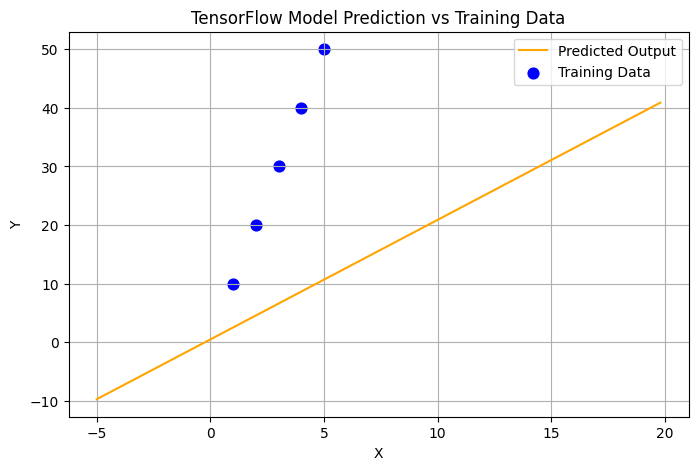

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 1. Prepare the Data
# Ensure data is float32 for neural networks
X_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
y_train = np.array([10.0, 20.0, 30.0, 40.0, 50.0], dtype=float)

# 2. Build the Model
# A single dense layer with 1 neuron and 1 input feature
model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])

# 3. Compile the Model
# Use 'Adam' optimizer and 'Mean Squared Error' loss
model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
# We run many 'epochs' (training loops) because the data size is very small
print("Training model...")
model.fit(X_train, y_train, epochs=500, verbose=0)

# Generate input range
X = np.arange(-5, 20, 0.2)

# Predict outputs
Y_pred = model.predict(X, verbose=0)

# Plot predictions
plt.figure(figsize=(8, 5))
plt.plot(X, Y_pred, color='orange', label='Predicted Output')

# Plot training data
plt.scatter(X_train, y_train, color='blue', s=60, label='Training Data')

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TensorFlow Model Prediction vs Training Data')
plt.legend()
plt.grid(True)

plt.show()


## PyTorch

In [6]:
import torch
import torch.nn as nn
import numpy as np

# 1. Prepare Tensors
X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
y = torch.tensor([[10.0], [20.0], [30.0], [40.0], [50.0]])

# 2. Define Model Architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(1, 1) # 1 input, 1 output

    def forward(self, x):
        return self.linear(x)

model = SimpleNN()

# 3. Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 4. Training Loop
for epoch in range(500):
    prediction = model(X)
    loss = criterion(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 5. Predict for any X value
X_test = torch.tensor([[10.0]])
with torch.no_grad():
    y_pred = model(X_test)
    print(f"PyTorch prediction for X=10: {y_pred.item():.2f}")


PyTorch prediction for X=10: 98.88


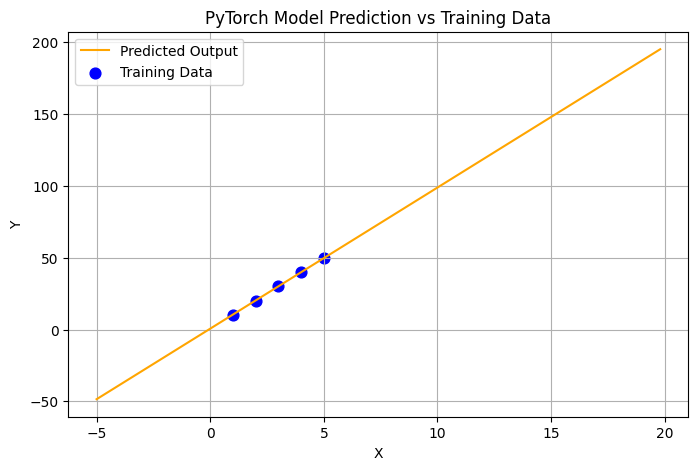

In [9]:
# -------------------------
# 5. Generate test inputs
# -------------------------
X_test = torch.arange(-5.0, 20.0, 0.2).view(-1, 1)

# -------------------------
# 6. Predict
# -------------------------
with torch.no_grad():
    Y_pred = model(X_test)

# -------------------------
# 7. Convert tensors to numpy
# -------------------------
X_test_np = X_test#.numpy()
Y_pred_np = Y_pred#.numpy()
X_train_np = X_train#.numpy()
y_train_np = y_train#.numpy()

# -------------------------
# 8. Plot results
# -------------------------
plt.figure(figsize=(8, 5))

# Predicted curve
plt.plot(X_test_np, Y_pred_np, color='orange', label='Predicted Output')

# Training points
plt.scatter(X_train_np, y_train_np, color='blue', s=60, label='Training Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('PyTorch Model Prediction vs Training Data')
plt.legend()
plt.grid(True)

plt.show()